# Bivariate Newton-Raphson solution for non-linear equation system

<div style="width: 100%; overflow: hidden;">
     <div style="width: 75%; float: left;"> 
     Systems of non-linear equations can be solved using iterative optimization. The example presented hereafter employs the Newton-Raphson method to find the intersection of two bi-variate polynomials $g_1(x,y)$ and $g_2(x,y)$. <div class="alert alert-block alert-info">
The provided example is authored by <b><a href="http://www.christopherhahne.de" style="text-decoration: none;">Christopher Hahne</a></b> and inspired by a <b><a href="https://www.math.colostate.edu/~gerhard/MATH331/lab/newton2d.html" style="text-decoration: none !important;">lab note</a></b> from Colorado State University.
 </div>
     <br>last update: 01/10/2020
     </div>
     <div style="margin-left: 80%;">
        <b>Author</b><br><br>
        <a href='http://www.christopherhahne.de', style="text-decoration: None; text-align: left;">
            <img align="left" src="http://www.christopherhahne.de/images/about.jpg" width="78"/>
            <br><br><br><br><br><br>
            <b>Christopher<br>Hahne, PhD</b>
        </a>
    </div>
</div>

Newton's method suits to solve a non-linear equation system via first-order Taylor expansion of high-order polynomials $g_1(x,y)$ and $g_2(x,y)$ given by

$$g_1(x,y)=x^2+y^2-1,\quad g_2(x,y)=x^4-y^4+xy$$

This is converted to vector-valued functions $\mathbf f\left(x, y\right)$ containing the above equations via

$$
\mathbf f\left(x, y\right) = 
  \begin{bmatrix} g_1(x,y)\\ g_2(x,y)\end{bmatrix} =
  \begin{bmatrix}  x^2+y^2-1 \\ x^4-y^4+xy \end{bmatrix}
$$

which is implemented as

In [1]:
function = lambda x: [x[0]**2+x[1]**2-1, x[0]**4-x[1]**4+x[0]*x[1]]

In the bi-variate case, we algebraically formulate the Fréchet-derivative as the Jacobian $\mathbf J(x, y)$ which can be obtained analytically as a square matrix given by

$$
    \mathbf{J}(x, y) = \begin{bmatrix}
      \dfrac{\partial g_1(x,y)}{\partial x} & \dfrac{\partial g_1(x,y)}{\partial y}\\[1em]
      \dfrac{\partial g_2(x,y)}{\partial x} & \dfrac{\partial g_2(x,y)}{\partial y} \end{bmatrix}
      = \begin{bmatrix}
      2x & 2y    \\
      4x^3+y & -4y^3+x \end{bmatrix}
$$

In [2]:
jacobian = lambda x: [[2*x[0], 2*x[1]], [4*x[0]**3 + x[1], -4*x[1]**3 + x[0]]]

For compactness, we let $\mathbf{x}_k \in \mathbb{R}^m$ with $\mathbf{x}_k=\left(x_k^{(1)}, x_k^{(2)}, ... ,x_k^{(m)}\right)^\intercal$ and $k\ge0$ is the iteration index so that a multivariate Newton method writes

$$
\mathbf{x}_{k+1}=\mathbf{x}_k - \big[\mathbf{J}(\mathbf{x}_k)\big]^{-1}\mathbf{f}(\mathbf{x}_k)
$$

for which we may plug in $\mathbf x_k=(x_k,y_k)^{\intercal}$ from the above terms giving

$$
\begin{bmatrix} x_{k+1} \\ y_{k+1}\end{bmatrix}=
\begin{bmatrix} x_k \\ y_k\end{bmatrix} - 
\begin{bmatrix} 2x_k & 2y_k \\ 4x_k^3+y_k & -4y_k^3+x_k \end{bmatrix}^{-1}
\begin{bmatrix}  x_k^2+y_k^2-1 \\ x_k^4-y_k^4+x_k y_k \end{bmatrix}
$$

An implementation of the multivariate Newton method is provided hereafter.

In [3]:
def multivar_newton(x, function, jacobian, l=1, tol=1e-11, eps=1):
    x_list = []
    while tol<eps<100:
        x_list.append(x.copy())
        f = function(x)
        J = jacobian(x)
        x -= l*np.dot(np.linalg.inv(J), f)
        eps = np.sum(np.abs(f))
    return x_list, eps

In [4]:
import numpy as np
guess = [-1, 1]
pts, eps = multivar_newton(guess, function, jacobian, l=1)
print('Solution found at %s in %s iterations with error %s.' % (pts[-1], len(pts), eps))

Solution found at [-0.85065081  0.52573111] in 6 iterations with error 2.0095036745715333e-13.


<IPython.core.display.Javascript object>


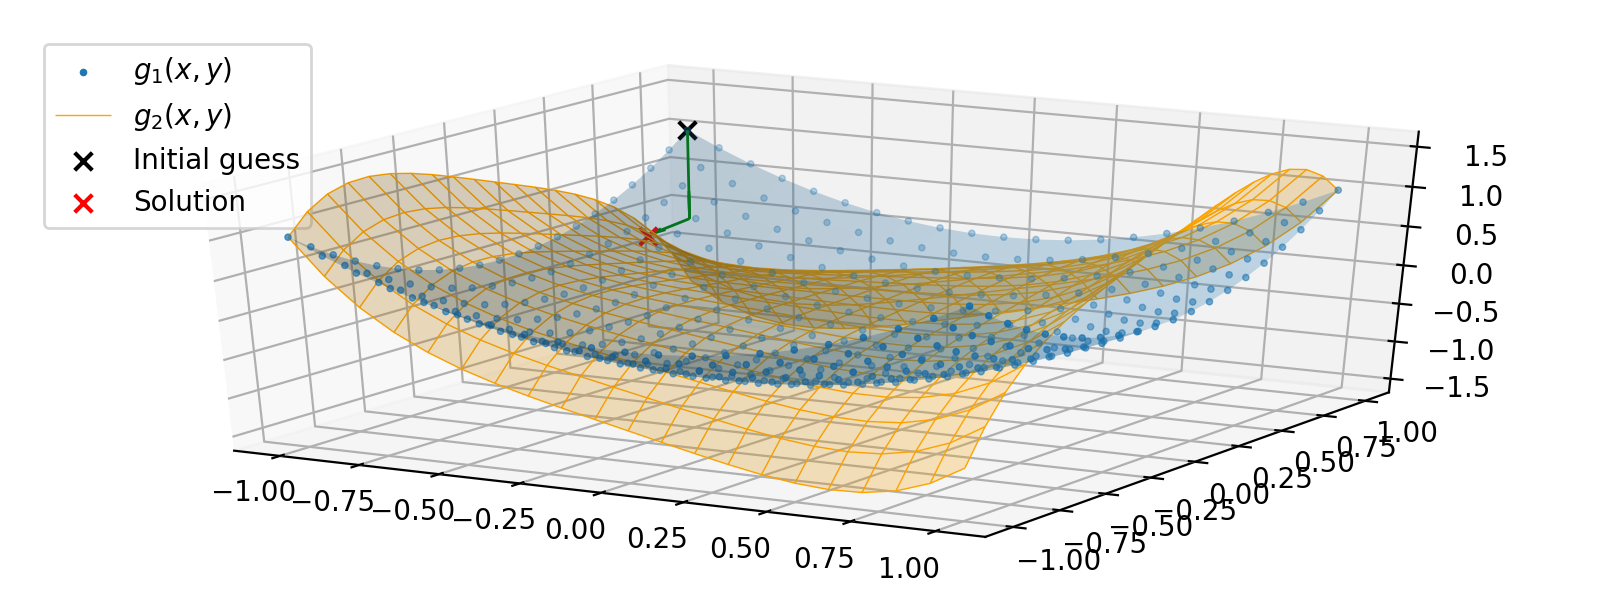

In [7]:
# compute grid
s = 1
x = np.linspace(-1*s, 1*s, 20*s+1)
y = np.linspace(-1*s, 1*s, 20*s+1)
xx, yy = np.meshgrid(x, y)
zz = function([xx, yy])

# import plot libs
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

# plot functions
fig, ax = (plt.figure(figsize=(8, 3)), plt.axes(projection='3d'))
ax.scatter(xx, yy, zz[0], linewidth=.5, s=5, label='$g_1(x, y)$')
ax.plot_surface(xx, yy, zz[0], alpha=.25)
ax.plot_wireframe(xx, yy, zz[1], linewidth=.5, color='orange', label='$g_2(x, y)$')
ax.plot_surface(xx, yy, zz[1], alpha=.25, color='orange')

# initial guess and solution
ax.scatter(pts[0][0], pts[0][1], function(pts[0])[0], s=40, marker='x', color='k', label='Initial guess')
ax.scatter(pts[-1][0], pts[-1][1], function(pts[-1])[0], s=40, marker='x', color='red', label='Solution')

# plot gradient steps
x_p = pts[0]
z_p = function(x_p)[0]
for x_k in pts[1:min(10, len(pts))]:
    z_k = function(x_k)[0]
    ax.quiver(x_p[0], x_p[1], z_p, x_k[0]-x_p[0], x_k[1]-x_p[1], z_k-z_p, linewidth=1, color='green')
    x_p, z_p = x_k, z_k

ax.legend()

plot_opt = False
if plot_opt:
    for i in x:
        for j in y:
            if i != 0 and j != 0:
                res, _ = multivar_newton([i, j], functional, jacobian, l=.5)
                ax.scatter(res_jac[-1][0], res[-1][1], functional(res[-1]), s=20, marker='x', color='g')
    ax.set_ylim([y[0], y[-1]])
    ax.set_xlim([x[0], x[-1]])
    ax.set_zlim(np.min(zz), np.max(zz))